# Attribute Prediction for Fashion Product Images
extracting descriptive attributes of a product given an image of the product

![](../MISC/header.png)

In [1]:
import sys
sys.path.append("../python_code")
from AttrPredModel import AttrPred_Resnet50
from iMatDataset import iMatDataset
import matplotlib.pyplot as plt
from PIL import Image
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### loading model

In [2]:
# path to downloaded model file. Must be adapted to fit your file structure!
model_path = "../TrainedModels/AttrPredModel.ckpt"
model = AttrPred_Resnet50.load_from_checkpoint(model_path).to(device)
model.eval()
print("Model Loaded successfully")

Model Loaded successfully


### loading dataset
Even if you want to just score a single image, you need to instanciate a iMatDataset object. This object will allow you to apply the correct normalization transformations to the image before inserting it into the model. Also it allows you to convert the predicted attribute scores into readable attribute predictions. 

So, even if you just want to score some own images, create a iMatDataset object that points to a valid attribute description file (given in `Data/iMaterialist/iMat_fashion_2018_label_map_228.csv`) and set img_dir and labels_file to an empty string. The returned object won't allow you to retreive any data but includes all the relevant utilities.

In [8]:
# creating empty dataset object for utilities only
json_path =  ""  
image_path = ""  
attr_descr_path = "../Data/iMaterialist/iMat_fashion_2018_label_map_228.csv"  # must be changed according to your file structure!
empty_ds = iMatDataset(labels_file=json_path, img_dir=image_path, attr_descr_file=attr_descr_path,
                rgb_mean=[0.6765, 0.6347, 0.6207], rgb_std=[0.3284, 0.3371, 0.3379])

In [4]:
# creating populated dataset
json_path =  "/home/mprinzler/storage/iMaterialist/validation.json"  # must be changed according to your file structure!
image_path = "/home/mprinzler/storage/iMaterialist/validation"  # must be changed according to your file structure!
attr_descr_path = "/home/mprinzler/storage/iMaterialist/iMat_fashion_2018_label_map_228.csv"  # must be changed according to your file structure!

ds = iMatDataset(labels_file=json_path, img_dir=image_path, attr_descr_file=attr_descr_path,
                rgb_mean=[0.6765, 0.6347, 0.6207], rgb_std=[0.3284, 0.3371, 0.3379])

### predicting attributes

Inserted Image


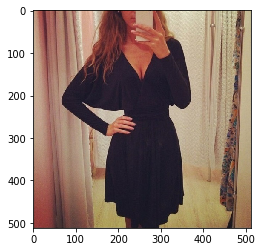

Predicted Attributes ['Black', 'Female', 'Long Sleeved', 'V-Necks']


In [12]:
# scoring of a single image
img_path = "../Data/iMaterialist/validation/1.jpg"  # change this to whatever image path you'd like

img_pil = Image.open(img_path).convert("RGB").resize((512, 512))
img_tensor = empty_ds.trafo_pil2tensor(img_pil)
pred_attr_scores = model(img_tensor.to(device).unsqueeze(0))[0].cpu()
pred_attr_OH = pred_attr_scores>0.
pred_attrs = empty_ds.OH2AttrName(pred_attr_OH)

print("Inserted Image")
plt.imshow(img_pil)
plt.show()
print("Predicted Attributes", pred_attrs)

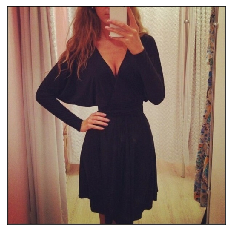

Predicted Attributes: ['Black', 'Female', 'Long Sleeved', 'V-Necks']





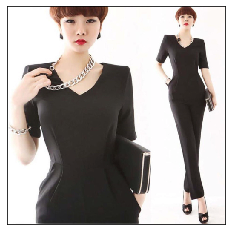

Predicted Attributes: ['Black', 'Female', 'V-Necks']





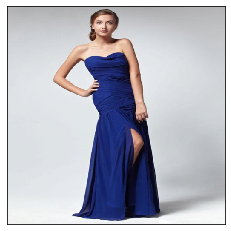

Predicted Attributes: ['Female', 'Ruched', 'Strapless', 'Sweetheart Neckline']





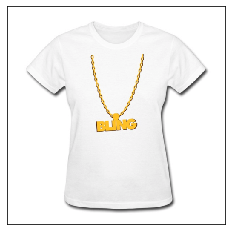

Predicted Attributes: ['Cotton', 'Female', 'Round Neck', 'Short Sleeves', 'T-Shirts']





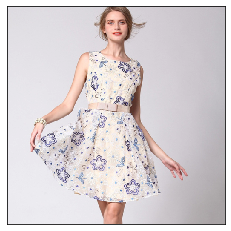

Predicted Attributes: ['Female', 'Round Neck', 'Sleeveless']





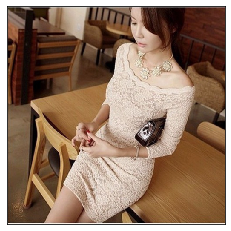

Predicted Attributes: ['Bodycon', 'Female', 'Lace', 'Long Sleeved']





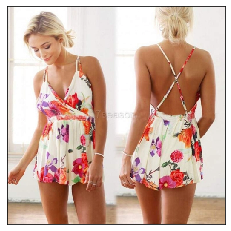

Predicted Attributes: ['Female', 'Jumpsuits Overalls & Rompers', 'Sleeveless', 'Spaghetti Straps', 'V-Necks']





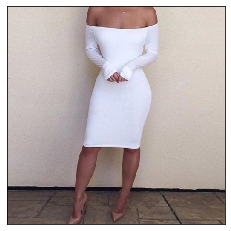

Predicted Attributes: ['Bodycon', 'Dresses', 'Female', 'Long Sleeved', 'Off The Shoulder', 'White']





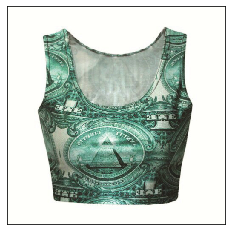

Predicted Attributes: ['Female', 'Printed', 'Sleeveless', 'Spandex']





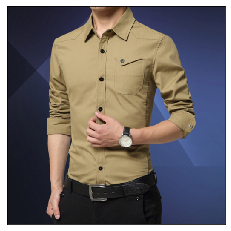

Predicted Attributes: ['Collared', 'Dress Shirts', 'Long Sleeved', 'Male']





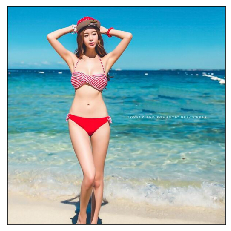

Predicted Attributes: ['Bikinis', 'Female', 'Nylon', 'Polyester', 'Spandex']





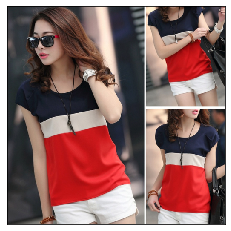

Predicted Attributes: ['Blouses', 'Chiffon', 'Female', 'Red', 'Round Neck', 'Short Sleeves']





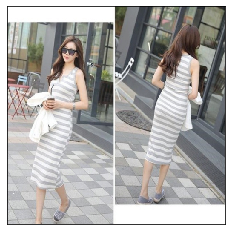

Predicted Attributes: ['Casual Dresses', 'Dresses', 'Female', 'Round Neck', 'Sleeveless', 'White']





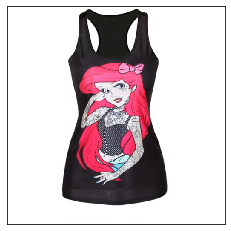

Predicted Attributes: ['Female', 'Polyester', 'Printed', 'Racerback', 'Sleeveless', 'Spandex', 'Tank Tops']





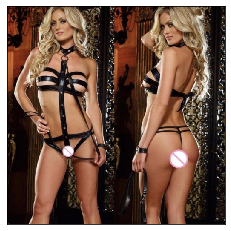

Predicted Attributes: ['Black', 'Female', 'Lingerie Sleepwear & Underwear', 'Sleeveless', 'V-Necks']





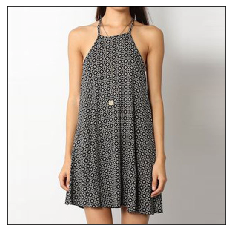

Predicted Attributes: ['Female', 'Sleeveless']





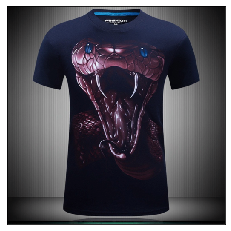

Predicted Attributes: ['Cotton', 'Male', 'Round Neck', 'Short Sleeves', 'T-Shirts']





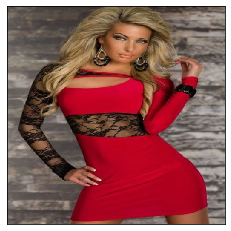

Predicted Attributes: ['Bodycon', 'Clubbing Dresses', 'Female', 'Lace', 'Long Sleeved', 'Red', 'Round Neck']





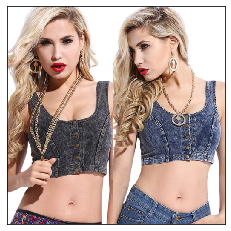

Predicted Attributes: ['Denim', 'Female', 'Sleeveless']





In [10]:
# predict attributes from non-empty iMatDataset
with torch.no_grad():
    for i in range(min(19, len(ds))):
        img_tensor, _ = ds[i]
        img_pil = ds.trafo_tensor2pil(img_tensor)
        pred_attr_scores = model(img_tensor.to(device).unsqueeze(0))[0].cpu()
        pred_attributes = ds.OH2AttrName(pred_attr_scores>0)
        plt.imshow(img_pil)
        ax = plt.gca()
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

        plt.show()
        fig = plt.gcf()
        plt.close(fig)
        print("Predicted Attributes:", pred_attributes)
        print("\n\n")